In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                       mean       std    median      5.0%     95.0%     n_eff     r_hat
             A[0]      0.20      0.53      0.33     -0.61      0.96    305.55      1.00
       alpha_1[0]     -4.28      0.54     -4.37     -4.99     -3.60    190.66      1.01
       alpha_2[0]     -0.30      0.53     -0.25     -1.26      0.47    203.00      1.00
        beta_1[0]      1.21      0.69      1.13      0.27      2.09    123.34      1.01
        beta_2[0]      2.50      0.76      2.43      1.29      3.73    296.59      1.00
      eta_high[0]     24.85     14.36     23.61      1.50     45.34    560.22      1.00
       eta_low[0]     24.40     14.68     24.03      0.16     45.76    296.20      1.01
       eta_max[0]      4.25      2.68      4.01      0.10      8.19    327.02      1.00
       eta_min[0]     30.41     11.60     30.05     14.49     49.97    663.59      1.00
    gamma_high[0]      5.98      1.25      6.01      4.00      7.71    231.45      1.01
     gamma_low[0]      3.00    

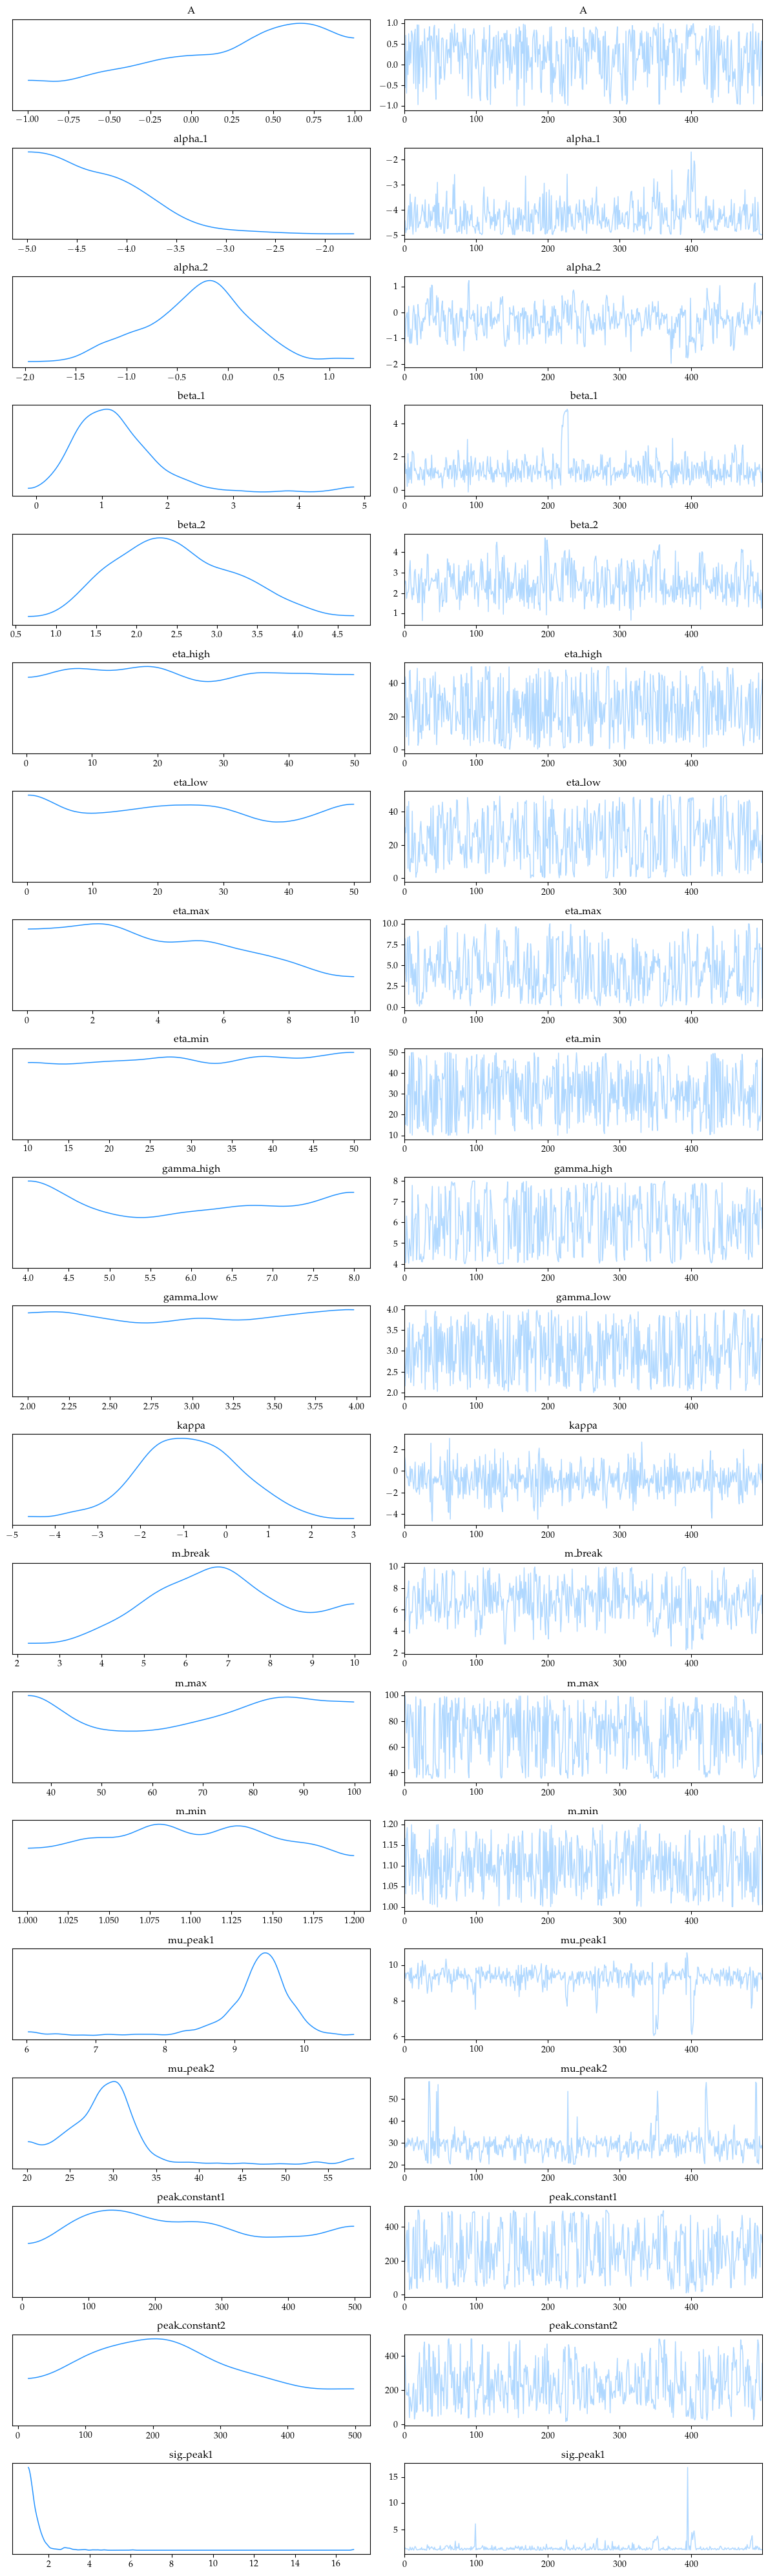

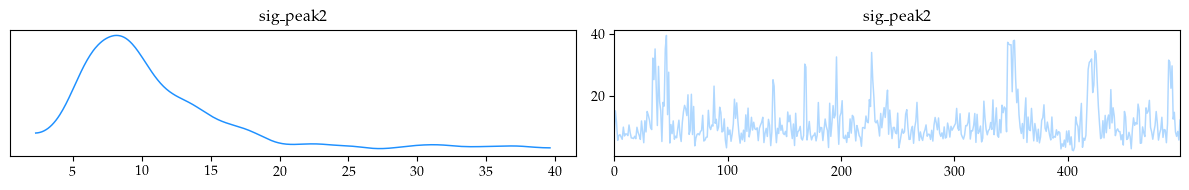

In [5]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")